# Análisis exploratorio

In [2]:
import pandas as pd
import regex
import requests
import unidecode
import os, glob
from pathlib import Path  
import cv2
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
from tqdm import tqdm
import shutil, sys
import PIL
import urllib.request
from wordcloud import WordCloud
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk import FreqDist

nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

import keras
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adelaidazuluaga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adelaidazuluaga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

TO-DO: 
* Graficar el tamaño de las imágenes por clase
* Número de únicos nombres por clase por categoria
* Word length por cada numbre de producto

In [20]:
def display_multiple_img(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    images = [cv2.imread(file) for file in glob.glob(images_paths)]
    for ind,image in enumerate(images):
        image_out = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image_out)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

In [22]:
def wordcloud_results(df_input_cat):
    text = " ".join(cat for cat in df_input_cat)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    return word_cloud

## Etapa 1: Análisis exploratorio por clases generales


In [5]:
cwd = os.getcwd()

filepath = Path(cwd+'/dataset_class.csv')  
df_class = pd.read_csv(filepath,sep=',')

In [6]:
df_class['categoria'].value_counts()

electronica  audio y video       1000
entradas para eventos            1000
souvenirs  cotillon y fiestas    1000
servicios                        1000
salud y equipamiento medico      1000
ropa y accesorios                1000
musica  peliculas y series       1000
joyas y relojes                  1000
inmuebles                        1000
industrias y oficinas            1000
herramientas                     1000
otras categorias                 1000
alimentos y bebidas              1000
camaras y accesorios             1000
bebes                            1000
animales y mascotas              1000
autos  motos y otros             1000
arte  libreria y merceria        1000
instrumentos musicales            999
antiguedades y colecciones        999
agro                              999
computacion                       999
juegos y juguetes                 999
deportes y fitness                998
electrodomesticos y aires ac      998
belleza y cuidado personal        998
construccion

# Distribución imágenes por clase

### Deportes y fitness

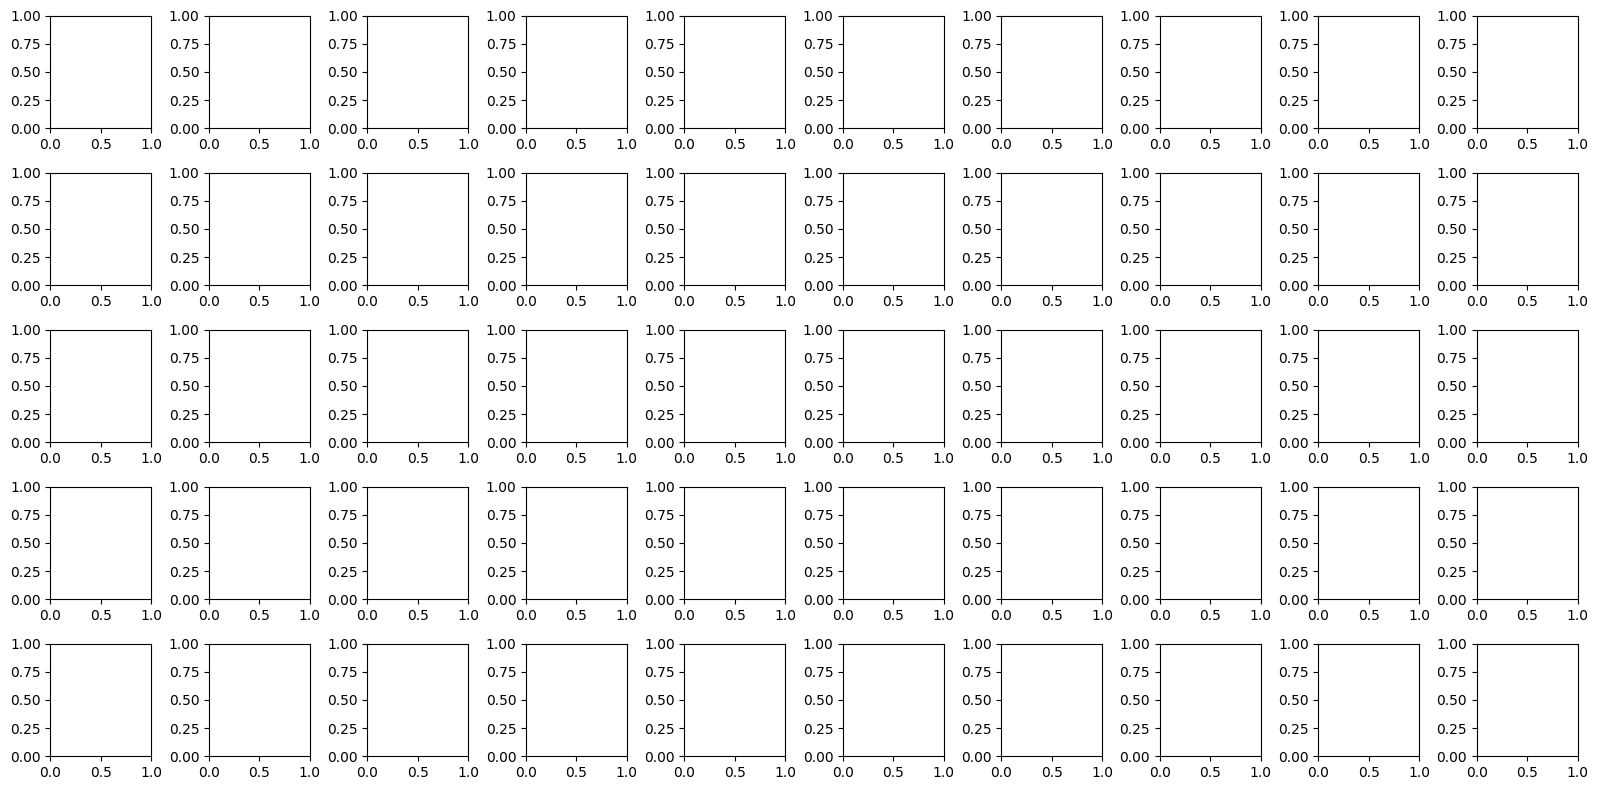

In [37]:
cwd = os.getcwd()
display_multiple_img(cwd+'/class_images_/deportes y fitness/*.jpg',5,10)

### Ropa y accesorios

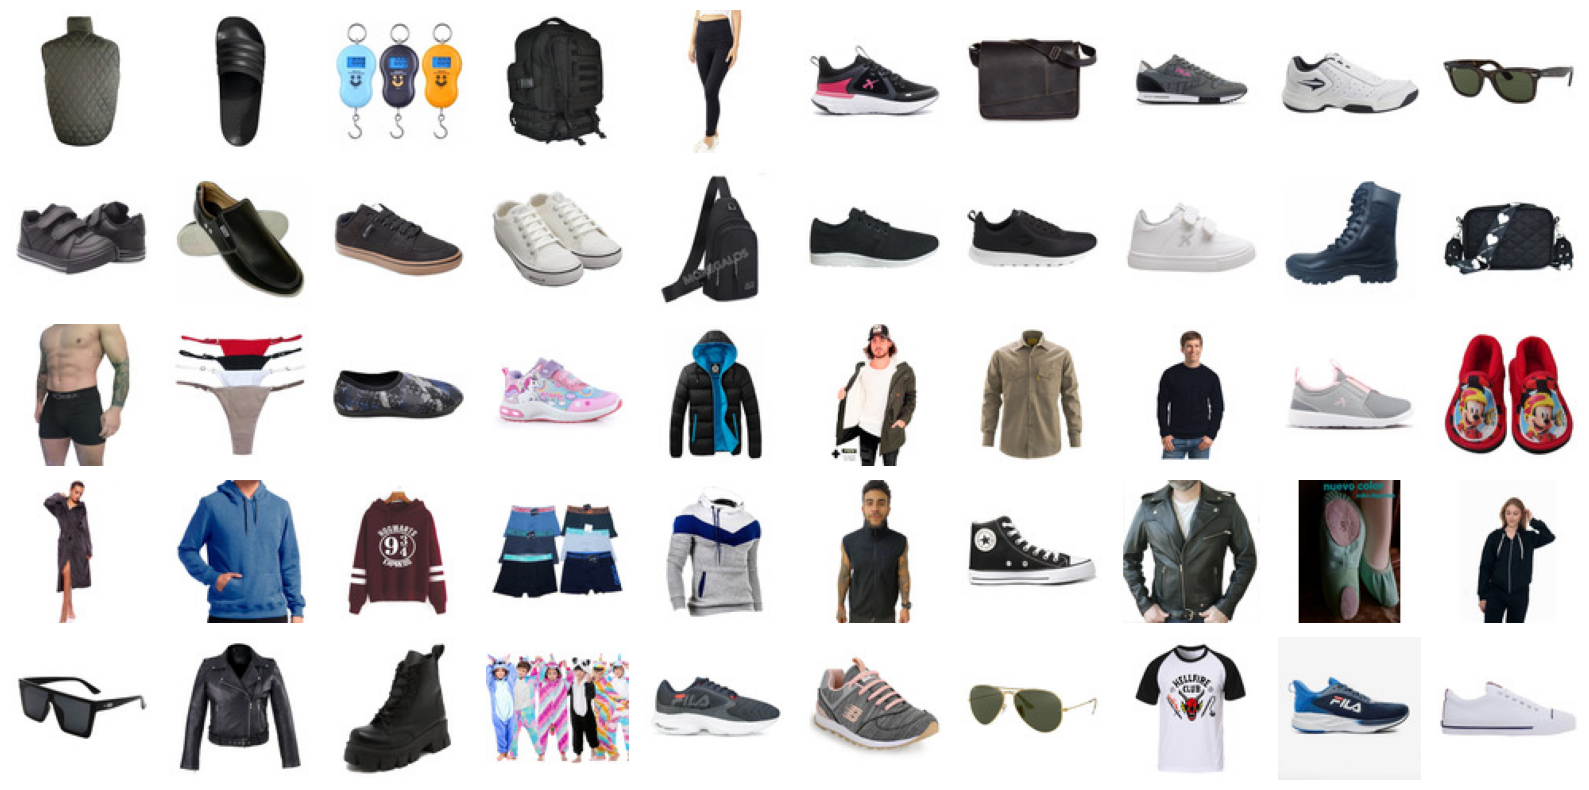

In [12]:
cwd = os.getcwd()
display_multiple_img(cwd+'/images_train/ropa y accesorios/*.jpg',5,10)

### Servicios

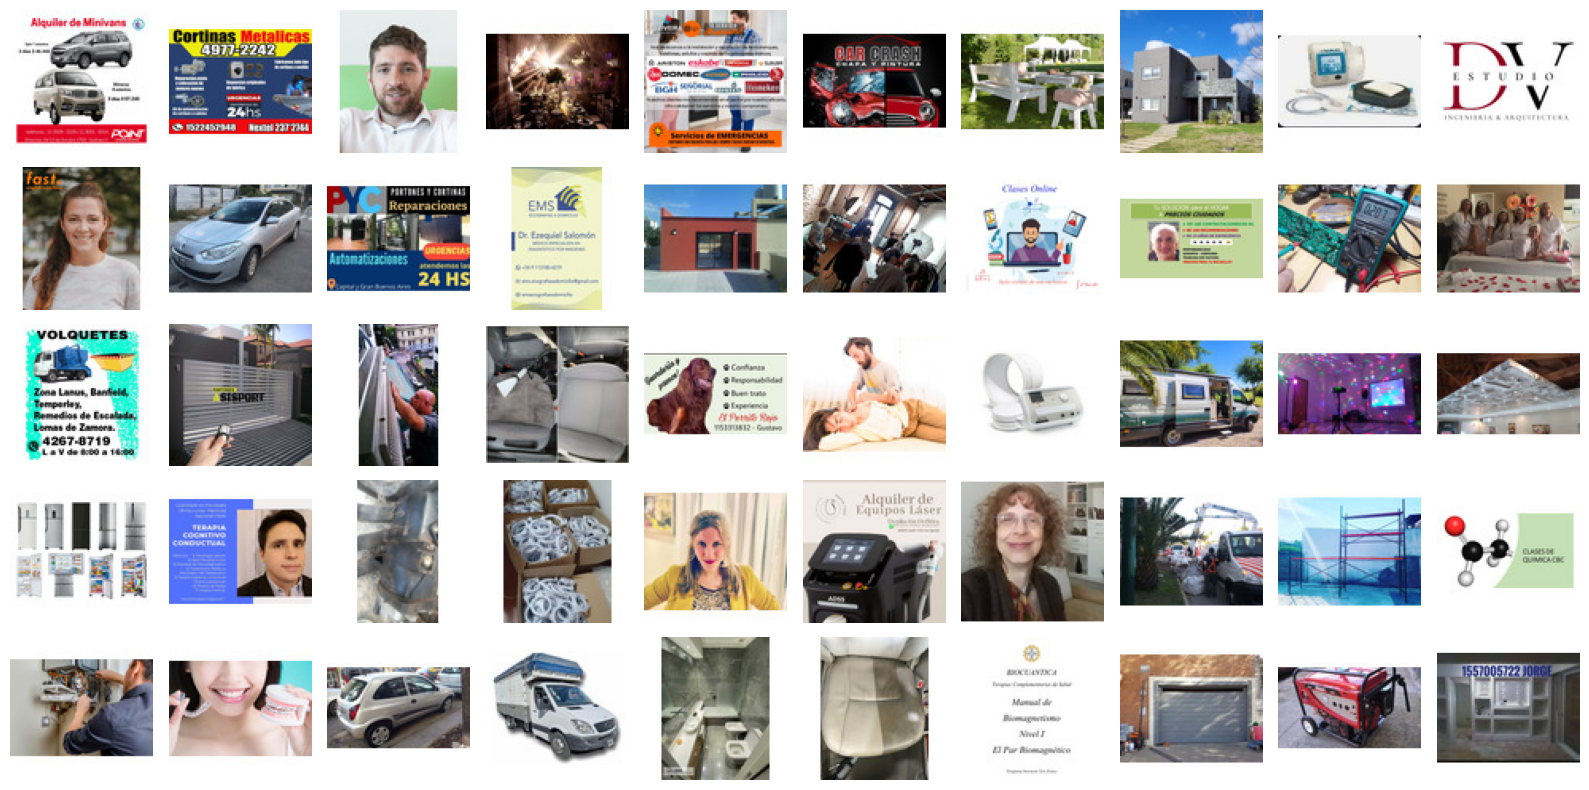

In [13]:
cwd = os.getcwd()
display_multiple_img(cwd+'/images_train/servicios/*.jpg',5,10)

# Entender algunas categorías

In [14]:
def word_cloud_cat(dictionary_input):
    for cat in dictionary_input:
        text = " ".join(cat for cat in dictionary_input[cat]['nombre_preproc'])
        word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(str(cat))
        plt.show()

In [15]:
def remove_stopwords(sentence):
    stop_words_full = stopwords.words('spanish')
    stop_words_full.extend(['NUMB'])
    return [ token for token in nltk.word_tokenize(sentence) if token not in stop_words_full ]

#### Deporte y fitness

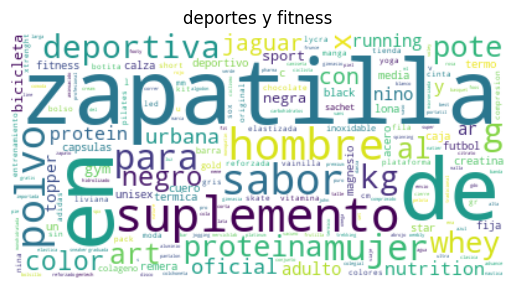

In [25]:
word_cloud_d = wordcloud_results(df_class[df_class['categoria']=='deportes y fitness']['nombre_preproc'])
plt.imshow(word_cloud_d, interpolation='bilinear')
plt.axis("off")
plt.title(str('deportes y fitness'))
plt.show()

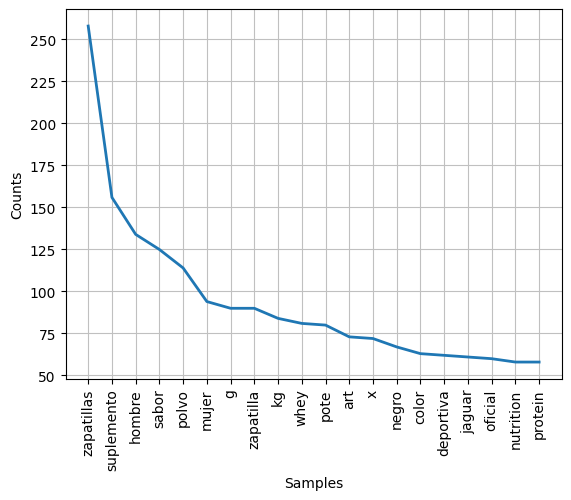

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
flat_list = [ xs for i in df_class[df_class['categoria']=='deportes y fitness']['nombre_preproc'] for xs in remove_stopwords(i)]
frequency_dist = FreqDist(flat_list)
frequency_dist.most_common(20)
frequency_dist.plot(20, cumulative=False)

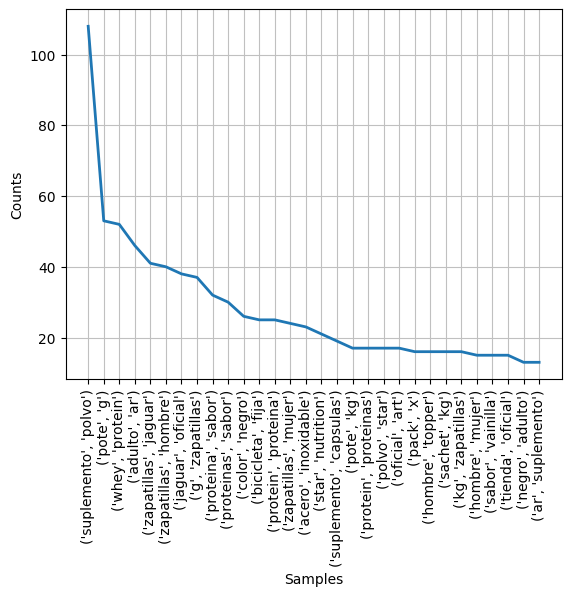

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
## Bigrams
flat_list = [ xs for i in df_class[df_class['categoria']=='deportes y fitness']['nombre_preproc'] for xs in remove_stopwords(i)]
text = " ".join(cat for cat in flat_list)
tokens = nltk.word_tokenize(text)
bgs = nltk.bigrams(tokens)
fdist = nltk.FreqDist(bgs)
fdist.plot(30)

#### Ropa y accesorios

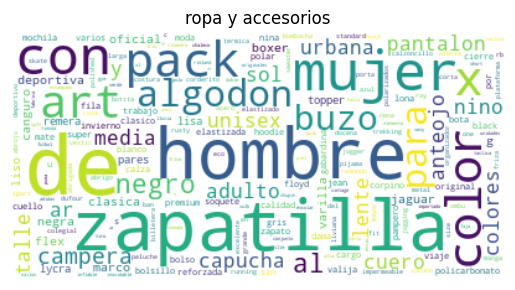

In [26]:
wordcloud_r = wordcloud_results(df_class[df_class['categoria']=='ropa y accesorios']['nombre_preproc'])
plt.imshow(wordcloud_r, interpolation='bilinear')
plt.axis("off")
plt.title(str('ropa y accesorios'))
plt.show()

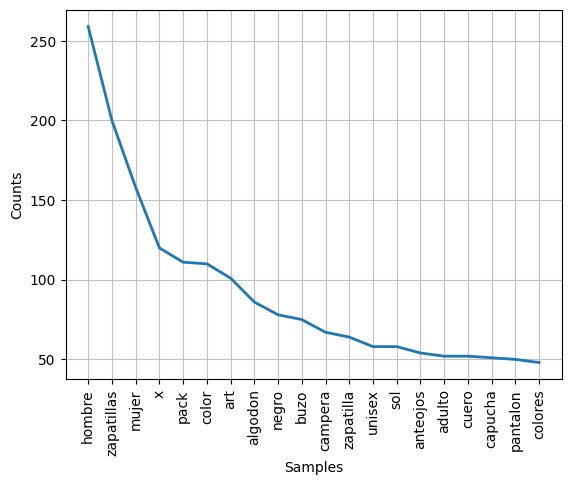

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
flat_list = [ xs for i in df_class[df_class['categoria']=='ropa y accesorios']['nombre_preproc'] for xs in remove_stopwords(i)]
frequency_dist = FreqDist(flat_list)
frequency_dist.most_common(20)
frequency_dist.plot(20, cumulative=False)

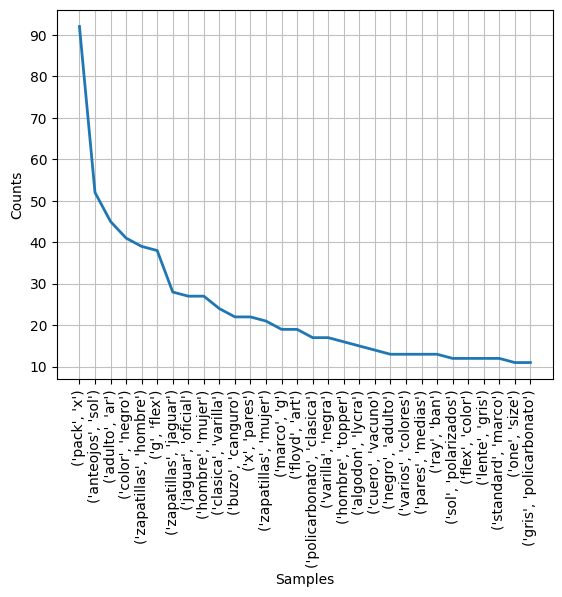

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
## Bigrams
flat_list = [ xs for i in df_class[df_class['categoria']=='ropa y accesorios']['nombre_preproc'] for xs in remove_stopwords(i)]
text = " ".join(cat for cat in flat_list)
tokens = nltk.word_tokenize(text)
bgs = nltk.bigrams(tokens)
fdist = nltk.FreqDist(bgs)
fdist.plot(30)

Los top n-gramas muestran las sub-categorías más relevantes en la categoría general

In [ ]:
# TO-DO:
# Explorar histogramas de precios por categoria y por subcategoria 
    #Esto con el fin de identificar por qué en la clasificación de textos deporte y fitness se equivoca
    #clasificando en ropa y accesorios/salud y equipamiento
    #Al averiguar si existe una diferencia notable entre precios, se agrega el valor del precio por producto en la clasificación de productos 
    

## Estudiar sub-categorías

In [ ]:
cwd = os.getcwd()

filepath = Path(cwd+'/dataset_sub_cats.csv')  
df_subclass = pd.read_csv(filepath,sep=',')

In [69]:
df_sub_cats = pd.DataFrame(df_subclass.groupby(['categoria','sub_categoria'])['nombre'].count()).reset_index().sort_values(by='nombre',ascending=True)

Ejemplo en el que se muestra por qué sólo la categoría no es suficiente

In [72]:
df_sub_cats[df_sub_cats['categoria']=='otras categorias']

categoria             sub_categoria  nombre
321  otras categorias     coberturas extendidas      27
319  otras categorias         acido clorhidrico      33
327  otras categorias      licencias para taxis      43
329  otras categorias                     otros      50
326  otras categorias    kits de criminalistica      50
325  otras categorias     insumos para tatuajes      50
324  otras categorias                gift cards      50
323  otras categorias                esoterismo      50
322  otras categorias             criptomonedas      50
320  otras categorias  articulos para fumadores      50
328  otras categorias          mangas de viento      50

In [76]:
df_sub_cats[df_sub_cats['sub_categoria']=='otros']['categoria'].nunique()
# a la subcategoría otros están asociados 28 tipos de categorías

28

In [79]:
df_sub_cats[df_sub_cats['sub_categoria']=='ropa deportiva']

categoria   sub_categoria  nombre
346   ropa y accesorios  ropa deportiva      50
184  deportes y fitness  ropa deportiva      50

# Análisis de datos posterior al análisis textual 


### Número de registros por clase

In [34]:
fig = px.histogram(df_sub_cats, x="categoria", y="sub_categoria", barmode='group',title='Número de subcategorias por clase')
fig.show()

In [35]:
df_subclass.groupby('sub_categoria').count()
# to have a balanced dataset: download the same number of registers per subclass, not per class

nombre  categoria  marca  precio  imagen  \
sub_categoria                                                              
aberturas                           50         50     50      50      50   
abrigos                             50         50     50      50      50   
acc  para motos y cuatriciclos      50         50     50      50      50   
accesorios de auto y camioneta      50         50     50      50      50   
accesorios de construccion          50         50     50      50      50   
...                                ...        ...    ...     ...     ...   
videojuegos                         49         49     49      49      49   
voley                               50         50     50      50      50   
wakeboard y esqui acuatico          50         50     50      50      50   
windsurf                            50         50     50      50      50   
zapatillas                          50         50     50      50      50   

                                nombre_preproc  numeric_sub_cat  
sub_categoria                                                    
aberturas                                   50               50  
abrigos                                     50               50  
acc  para motos y cuatriciclos              50               50  
accesorios de auto y camioneta              50               50  
accesorios de construccion                  50               50  
...                                        ...              ...  
videojuegos                                 49               49  
voley                                       50               50  
wakeboard y esqui acuatico                  50               50  
windsurf                                    50               50  
zapatillas                                  50               50  

[351 rows x 7 columns]

## Estudiar sub-categorías

In [32]:
cwd = os.getcwd()

filepath = Path(cwd+'/dataset_sub_cats.csv')  
df_subclass = pd.read_csv(filepath,sep=',')

In [107]:
df_subclass['precio'].fillna(0, inplace=True)
df_subclass['precio'] = df_subclass['precio'].astype(int)

In [119]:
df_subclass['categoria'].unique()

array(['accesorios para vehiculos', 'agro', 'alimentos y bebidas',
       'animales y mascotas', 'antiguedades y colecciones',
       'arte  libreria y merceria', 'autos  motos y otros', 'bebes',
       'belleza y cuidado personal', 'camaras y accesorios',
       'celulares y telefonos', 'computacion', 'consolas y videojuegos',
       'construccion', 'deportes y fitness',
       'electrodomesticos y aires ac', 'electronica  audio y video',
       'entradas para eventos', 'herramientas', 'hogar  muebles y jardin',
       'industrias y oficinas', 'inmuebles', 'instrumentos musicales',
       'joyas y relojes', 'juegos y juguetes',
       'libros  revistas y comics', 'musica  peliculas y series',
       'ropa y accesorios', 'salud y equipamiento medico', 'servicios',
       'souvenirs  cotillon y fiestas', 'otras categorias'], dtype=object)

### Distribución de precios por categoría 

* Se comparan los casos identificados como similares en la clasificación de categorías 

/var/folders/_2/mn5plcvd0135m5y5pgyz6zpm0000gn/T/ipykernel_24670/1248223625.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/_2/mn5plcvd0135m5y5pgyz6zpm0000gn/T/ipykernel_24670/1248223625.py:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/_2/mn5plcvd0135m5y5pgyz6zpm0000gn/T/ipykernel_24670/

[Text(0.5, 1.0, 'salud y equipamiento medico')]

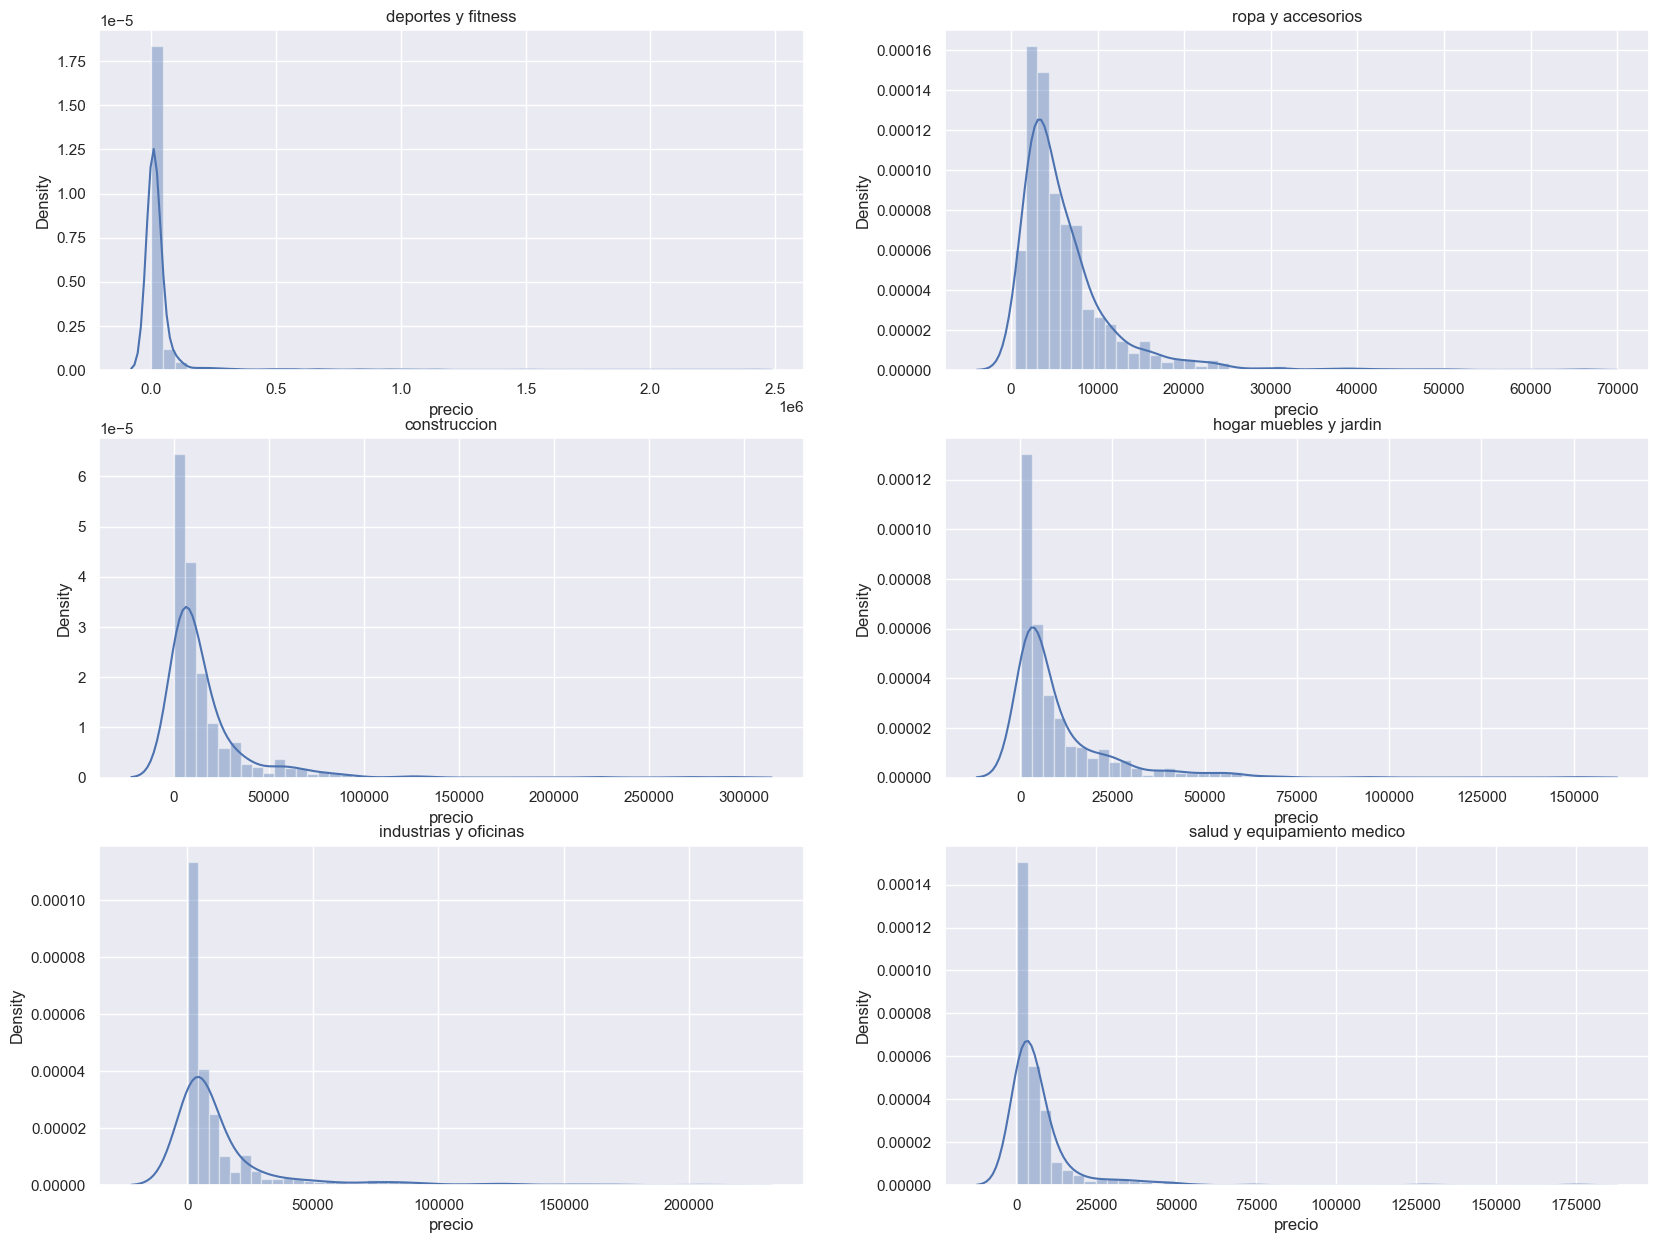

In [128]:
import numpy as np
sns.set_style('ticks')

sns.set(rc={"figure.figsize": (20, 15)}); np.random.seed(0)

plt.subplot(3,2,1)
ax = sns.distplot(df_subclass[df_subclass['categoria']=='deportes y fitness']["precio"].dropna(),kde=True)
ax.set(title = "deportes y fitness")

plt.subplot(3,2,2)
ax = sns.distplot(df_subclass[df_subclass['categoria']=='ropa y accesorios']["precio"].dropna())
ax.set(title = "ropa y accesorios")

plt.subplot(3,2,3)
ax = sns.distplot(df_subclass[df_subclass['categoria']=='construccion']["precio"].dropna())
ax.set(title = "construccion")

plt.subplot(3,2,4)
ax = sns.distplot(df_subclass[df_subclass['categoria']=='hogar  muebles y jardin']["precio"].dropna())
ax.set(title = "hogar muebles y jardin")

plt.subplot(3,2,5)
ax = sns.distplot(df_subclass[df_subclass['categoria']=='industrias y oficinas']["precio"].dropna())
ax.set(title = "industrias y oficinas")

plt.subplot(3,2,6)
ax = sns.distplot(df_subclass[df_subclass['categoria']=='salud y equipamiento medico']["precio"].dropna())
ax.set(title = "salud y equipamiento medico")



## Display Images 

In [55]:
df_zap  = df_subclass[df_subclass['sub_categoria']=='zapatillas']

In [49]:
def display_multiple_img(df_in, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    response = [requests.get(url) for url in df_in['imagen']]
    img = [Image.open(BytesIO(res.content)) for res in response]
    for ind,image in enumerate(img):
        image_out = image 
        try:
            ax.ravel()[ind].imshow(image_out)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

In [53]:
df_zap_dep  = df_subclass[(df_subclass['categoria']== 'deportes y fitness') & (df_subclass['sub_categoria']=='zapatillas')]

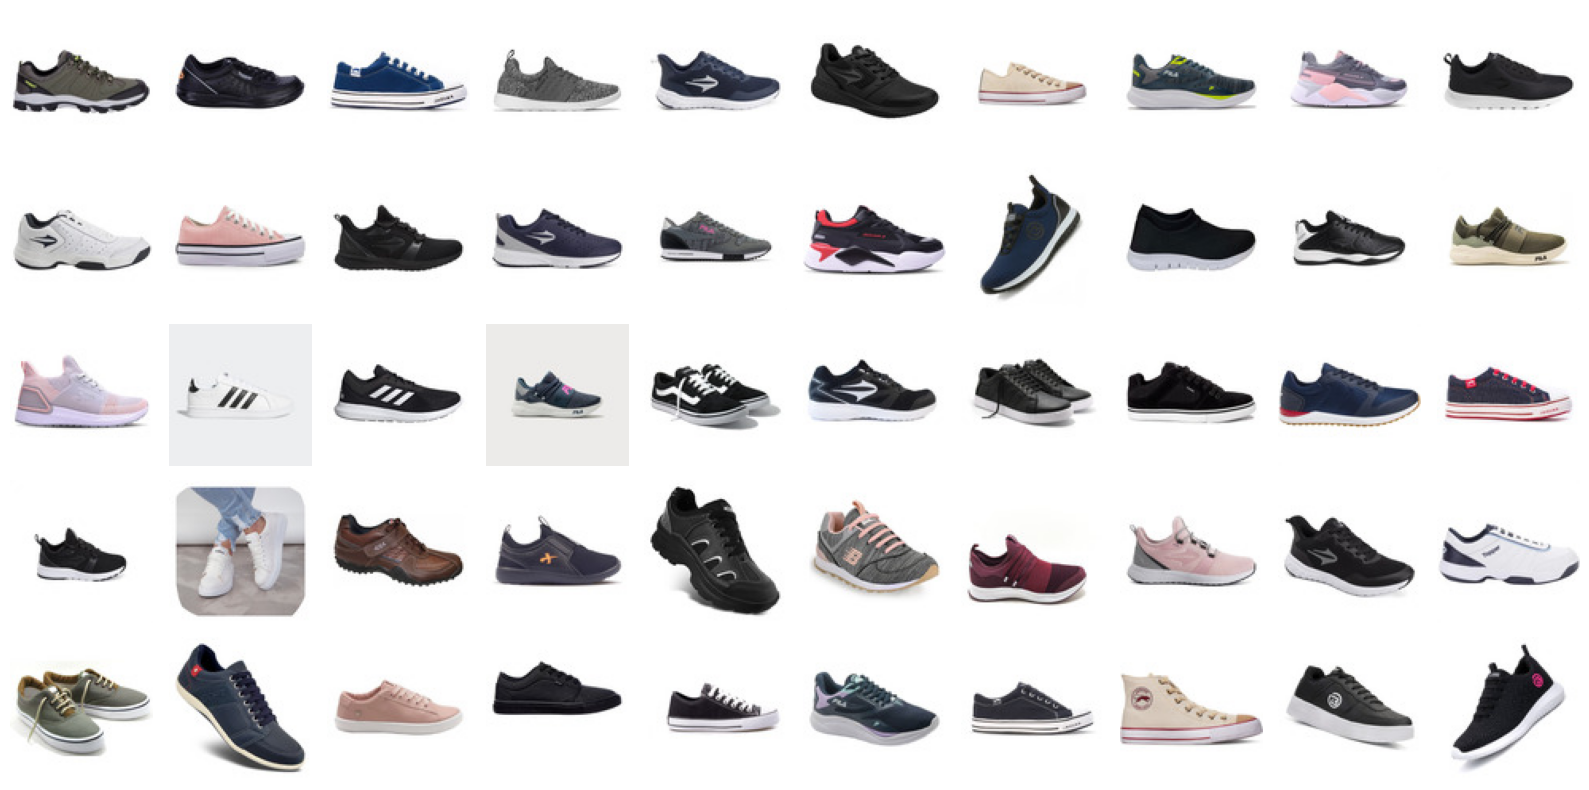

In [54]:
display_multiple_img(df_zap_dep,5,10)

# Extract image feature vector

In [ ]:
# Feature vector: 

In [30]:
import os
from PIL import Image
import numpy as np


In [34]:
def extract_features(directory):
    model=tf.keras.applications.xception.Xception(include_top=False, pooling='avg')
    features = {}
    for (root,dirs,files) in tqdm(os.walk(directory)):
        for img in files: 
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            image = image/127.5
            image = image - 1.0
            feature = model.predict(image)
            features[img] = feature
    return features

In [35]:
cwd

'/Users/adelaidazuluaga/Documents/AdelaidaZuluaga'

In [36]:
out_ = extract_features('/Users/adelaidazuluaga/Documents/AdelaidaZuluaga/images_train/belleza y cuidado personal')

0it [00:00, ?it/s]

1/1 [==============================] - 0s 433ms/step


1/1 [==============================] - 0s 409ms/step


1/1 [==============================] - 0s 462ms/step


1it [08:28, 508.97s/it]


In [39]:
out_['belleza y cuidado personal633.jpg'].shape

(1, 2048)